In [1]:
import pandas as pd
import matplotlib.pyplot as plt

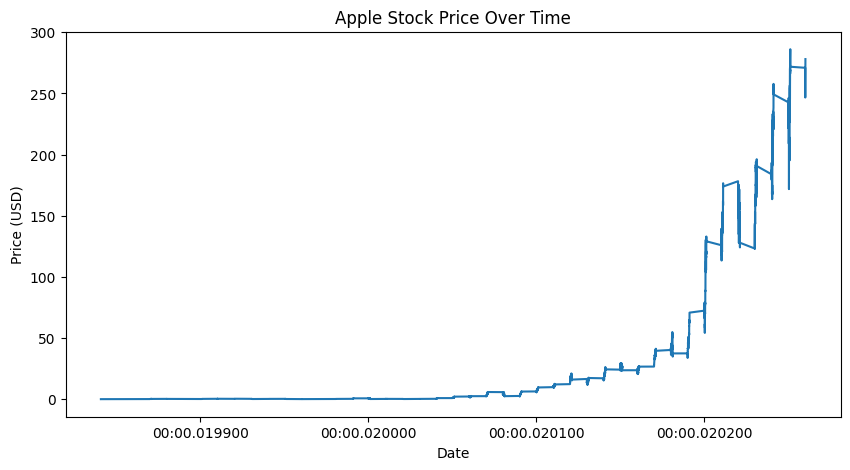

In [2]:
df = pd.read_csv("data/prices.csv")
df.head()

df['<DATE>'] = pd.to_datetime(df['<DATE>'], errors='coerce')
df = df.sort_values('<DATE>')

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(df["<DATE>"], df["<CLOSE>"])

plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

df = df.dropna(subset=["<DATE>", "<CLOSE>"])
df = df.sort_values("<DATE>")
df = df.drop_duplicates(subset=["<DATE>"])


plt.show()

In [3]:

df = df.dropna(subset=["<DATE>", "<CLOSE>"])
df = df.sort_values("<DATE>")
df = df.drop_duplicates(subset=["<DATE>"])


In [4]:
df[["<DATE>", "<CLOSE>"]].head()
df[["<DATE>", "<CLOSE>"]].tail()


,<DATE>,<CLOSE>
10430,1970-01-01 00:00:00.020260202,270.01
10431,1970-01-01 00:00:00.020260203,269.48
10432,1970-01-01 00:00:00.020260204,276.49
10433,1970-01-01 00:00:00.020260205,275.91
10434,1970-01-01 00:00:00.020260206,278.12


In [5]:
df["<CLOSE>"].describe()


count    10435.000000
mean        31.051241
std         60.730495
min          0.053988
25%          0.292346
50%          1.208620
75%         24.909650
max        286.190000
Name: <CLOSE>, dtype: float64

In [6]:
df["Return"] = df["<CLOSE>"].pct_change()
df["Target"] = (df["Return"].shift(-1) > 0).astype(int)

df["MA5"] = df["<CLOSE>"].rolling(5).mean()
df["MA20"] = df["<CLOSE>"].rolling(20).mean()
df["Volatility"] = df["Return"].rolling(5).std()

df = df.dropna()


In [7]:
df = df.dropna()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10416 entries, 19 to 10434
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   <TICKER>    10416 non-null  str           
 1   <PER>       10416 non-null  str           
 2   <DATE>      10416 non-null  datetime64[ns]
 3   <TIME>      10416 non-null  int64         
 4   <OPEN>      10416 non-null  float64       
 5   <HIGH>      10416 non-null  float64       
 6   <LOW>       10416 non-null  float64       
 7   <CLOSE>     10416 non-null  float64       
 8   <VOL>       10416 non-null  int64         
 9   <OPENINT>   10416 non-null  int64         
 10  Return      10416 non-null  float64       
 11  Target      10416 non-null  int64         
 12  MA5         10416 non-null  float64       
 13  MA20        10416 non-null  float64       
 14  Volatility  10416 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4), str(2)
memory usage: 1.2 MB


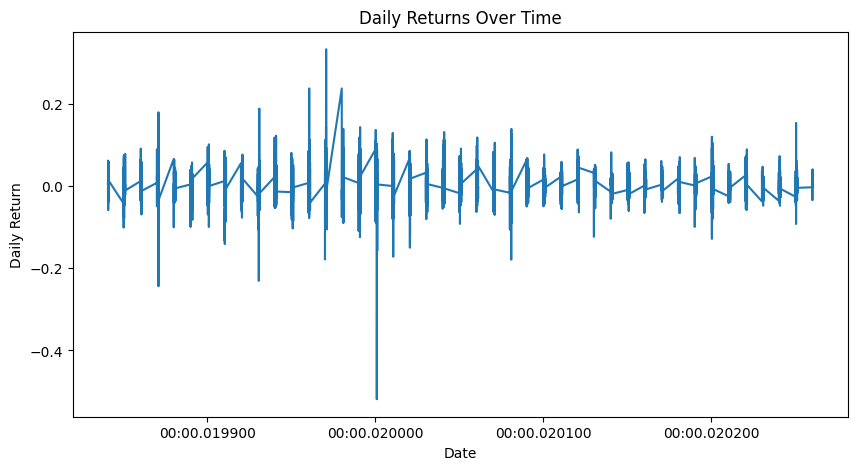

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df["<DATE>"], df["Return"])
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


In [9]:
df["MA20"] = df["<CLOSE>"].rolling(window=20).mean()


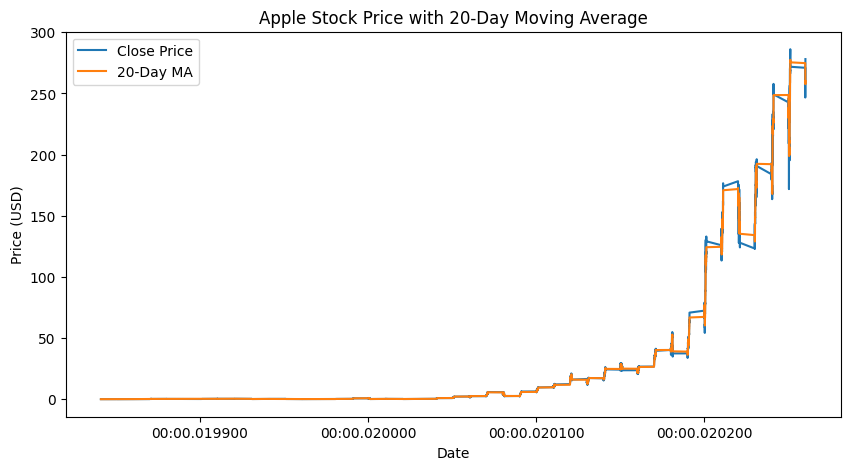

In [10]:
plt.figure(figsize=(10,5))

plt.plot(df["<DATE>"], df["<CLOSE>"], label="Close Price")
plt.plot(df["<DATE>"], df["MA20"], label="20-Day MA")

plt.title("Apple Stock Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

plt.show()


In [11]:
X = df[["MA5", "MA20", "Volatility"]]
y = df["Target"]


In [12]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.46641074856046066


In [17]:
df["Target"].value_counts(normalize=True)


Target
1    0.502784
0    0.497216
Name: proportion, dtype: float64

In [18]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.46641074856046066


In [19]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=20,
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",20
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [20]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.5381661065770523
Test Accuracy: 0.4678502879078695
